# Esercizio 1

Un’urna contiene 10 palline di cui 4 Bianche e 6 Nere. Si eseguono 5 estrazioni con reimmissione.

1. Tracciare grafico della funzione massa di probabilità della variabile casuale X=”numero di palline bianche estratte”
2. Calcolare P(estrarre 2 bianche).
3. Calcolare P(estrarre al più 2 bianche).
4. Calcolare P(estrarre almeno 2 bianche).
5. Qual è il numero minimo x tale che la P(estrarre al più x bianche) sia almeno uguale (≥) a 0.8?

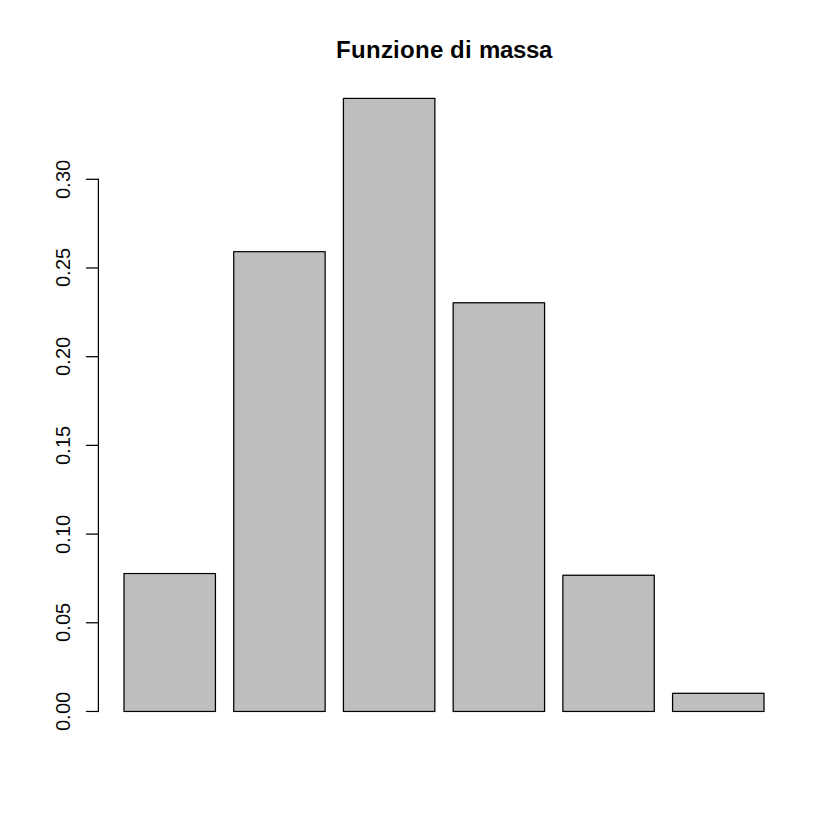

In [2]:
barplot(dbinom(0:5, 5, 0.4), main="Funzione di massa")

In [3]:
dbinom(2, 5, 0.4)

[1] 0.3456

In [7]:
pbinom(2, 5, 0.4)

[1] 0.68256

In [8]:
1 - pbinom(1, 5, 0.4)

[1] 0.66304

In [12]:
min(c(0:5)[pbinom(0:5, 5, 0.4)>=0.8])

[1] 3

# Esercizio 2

Si eseguono 10 estrazioni senza reimmissione da un’urna.

1. Tracciare il grafico della funzione massa di probabilità della variabile casuale X=”numero di palline bianche estratte” nei seguenti casi:
     1. l’urna contenente 100 palline di cui 20 Bianche e le restanti Nere.
     2. l’urna contiene 100 palline di cui 2 Bianche e le restanti Nere.
2. Tracciare il grafico della funzione massa di probabilità della variabile casuale X nel caso dell’urna 1 se si eseguono 25 estrazioni

3. Consideriamo l’urna 1 e n=10 estrazioni. Si aumenti il numero totale M di palline nell’urna mantenendo uguale a 0.2 la frazione di palline bianche. Per ciascun valore di M confrontare graficamente la distribuzione di probabilità del numero di palline bianche estratte nel caso di estrazioni con e senza reimmissione. Provare con 20, 40 e 200 palline bianche.

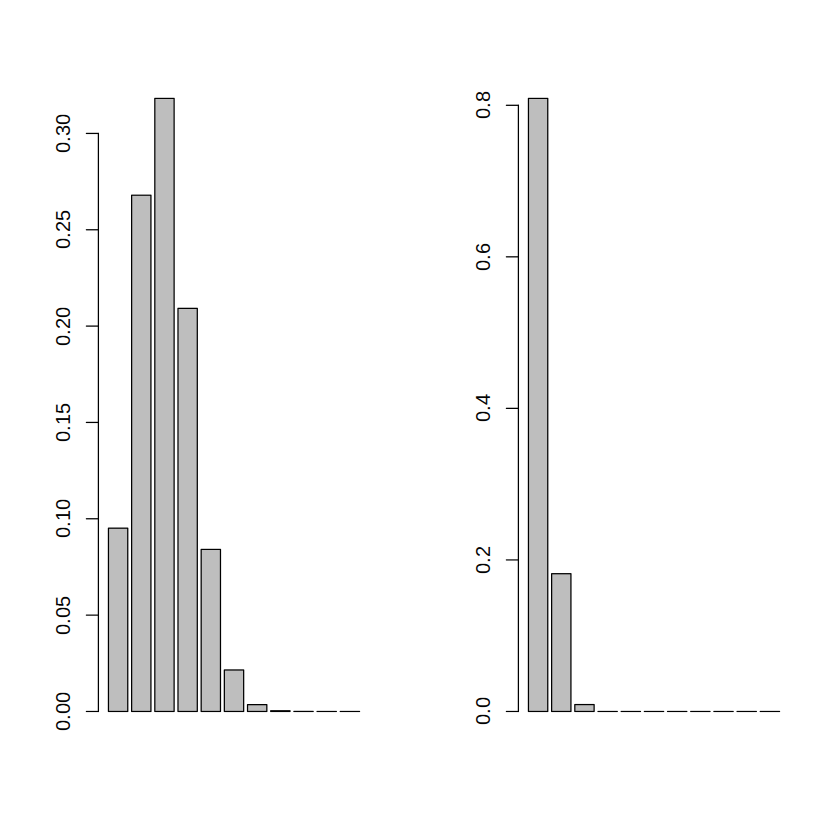

In [17]:
par(mfrow=c(1,2))
barplot(dhyper(0:10, 20, 80, 10))
barplot(dhyper(0:10, 2, 98, 10))

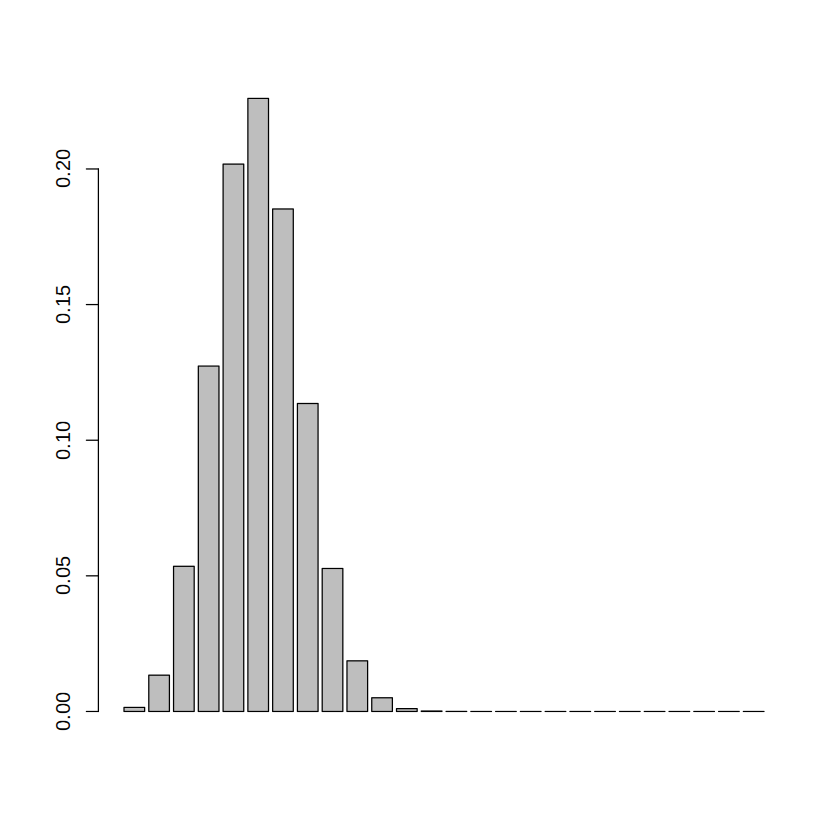

In [18]:
barplot(dhyper(0:25, 20, 80, 25))

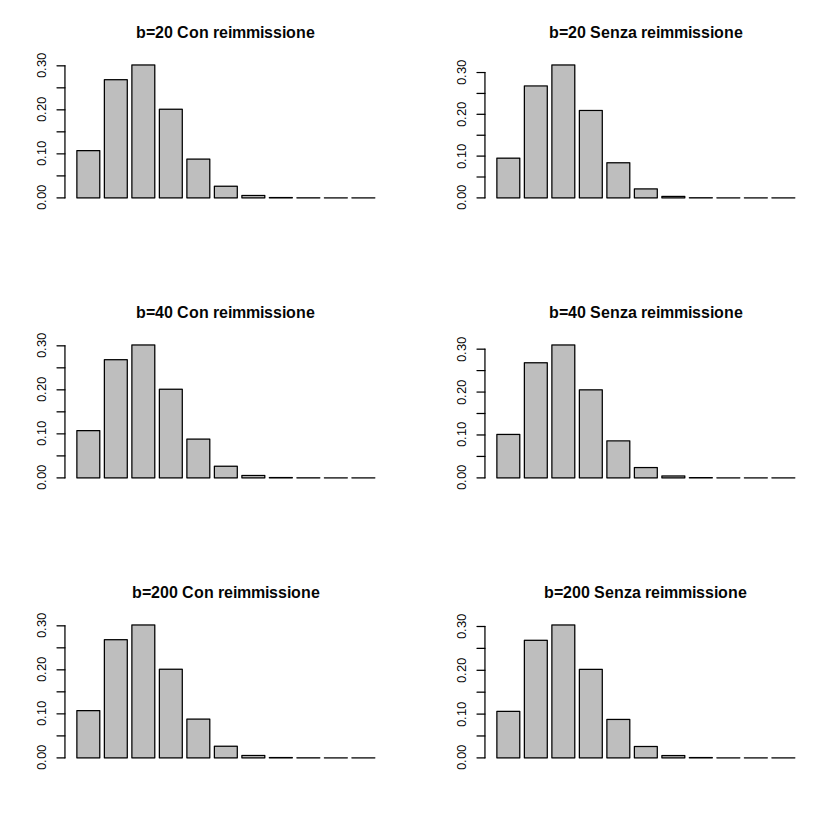

In [20]:
par(mfrow=c(3,2))
barplot(dbinom(0:10, 10, 0.2), main="b=20 Con reimmissione")
barplot(dhyper(0:10, 20, 80, 10), main="b=20 Senza reimmissione")
barplot(dbinom(0:10, 10, 0.2), main="b=40 Con reimmissione")
barplot(dhyper(0:10, 40, 160, 10), main="b=40 Senza reimmissione")
barplot(dbinom(0:10, 10, 0.2), main="b=200 Con reimmissione")
barplot(dhyper(0:10, 200, 800, 10), main="b=200 Senza reimmissione")

# Esercizio 3

1. Calcolare la probabilità di ottenere più teste che croci lanciando 7 volte una moneta truccata con probabilità di avere croce pari a 0.45
2. Calcolare la probablità di avere almeno 3 sei lanciando 5 dadi a 12 facce
3. Calcolare la probabiltà di estrarre 20 euro da un sacco contenente 47 monete da 1 centesimo e 53 da 2 euro estraendo (uniformemente) a caso 10 monete senza reinserirle
4. Un grammo di uranio emette mediamente 2152 particelle αα ogni millisecondo. Qual è con buona approssimazione la probabilità che un grammo di uranio emetta al più 2000 particelle αα in un millisecondo

In [24]:
pbinom(3, 7, 0.45)

[1] 0.6082878

In [28]:
1 - pbinom(2, 5, 1/12)

[1] 0.00508777

In [31]:
dhyper(10, 53, 47, 10)

[1] 0.001126444

In [32]:
ppois(2000, 2152)

[1] 0.0004805614

# Esercizio 4

1. Si generi un campione di 10000 valori estratti da una distribuzione geometrica di parametro p=0.5.
2. Si confrontino attraverso un qq plot la distribuzione empirica dei dati e quella teorica

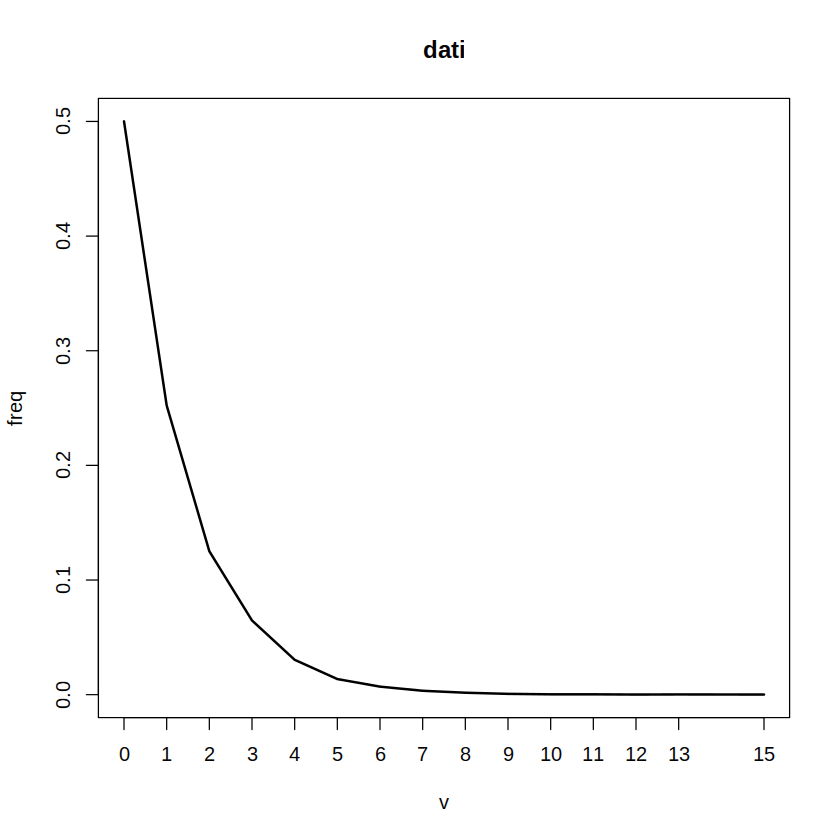

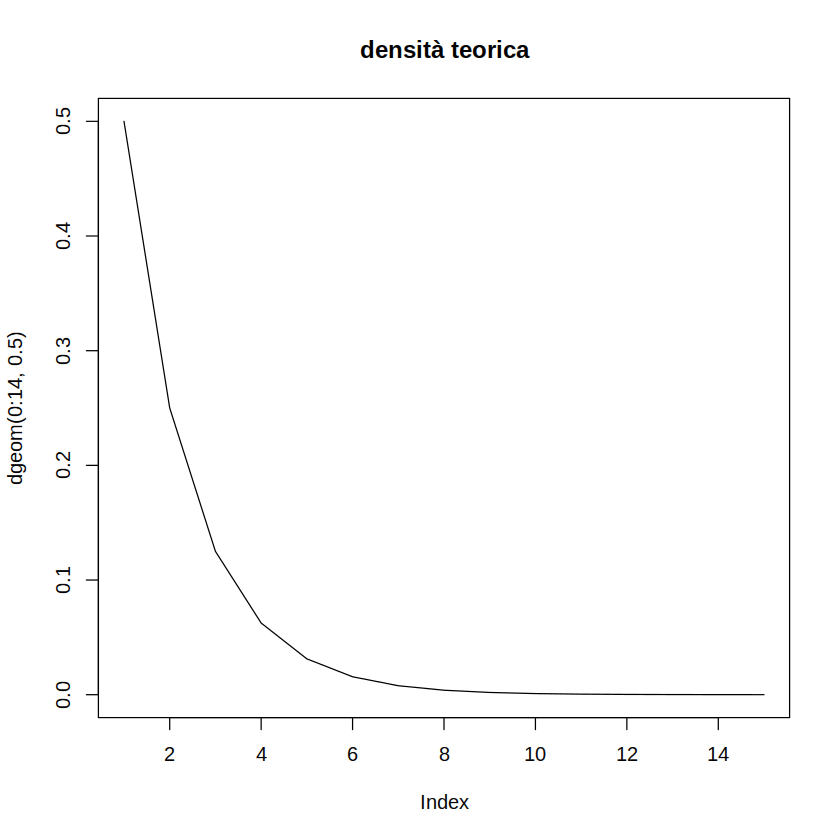

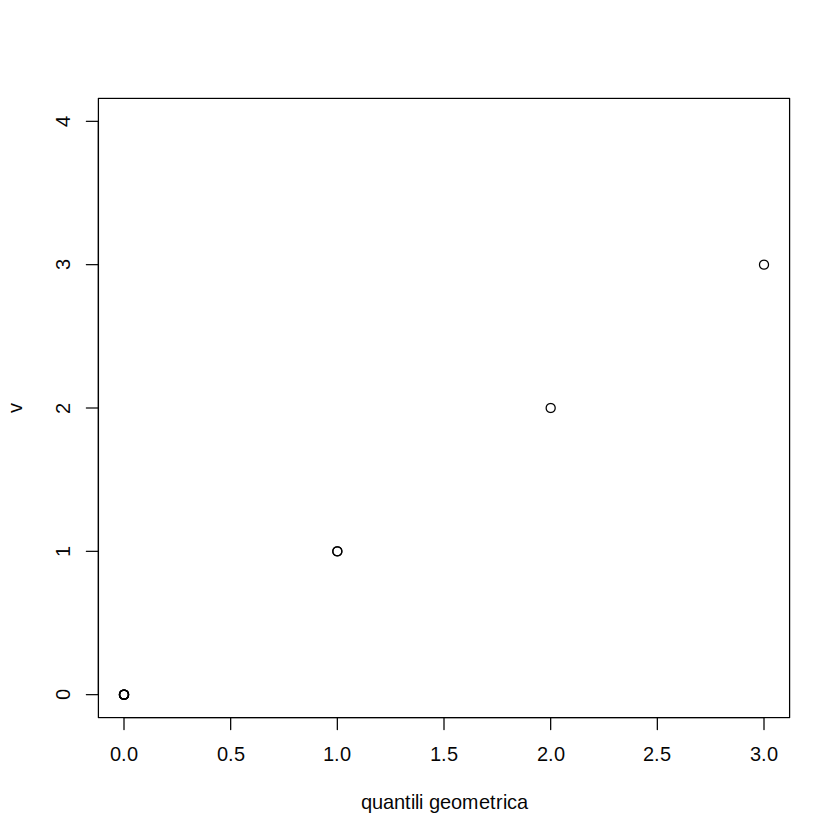

In [39]:
v = rgeom(10000, 0.5)
plot(prop.table(table(v)), ylab="freq", type="l", main="dati")
plot(dgeom(0:14, 0.5), type="l", main="densità teorica")
qqplot(qgeom(seq(0, 1, 0.1), 0.5), v, xlab="quantili geometrica", ylim=c(0,4))

# Esercizio 5

1. Un uomo si risveglia nel deserto a mezzogiorno con addosso soltanto un paio di mutande. Dopo ogni minuto ha una probabilità del 3% di perdere conoscenza per via delle condizioni estreme. Calcolare la probabilità che l’uomo sopravviva alle prime due ore e la probabilità che l’uomo muoia dopo esattamente un quarto d’ora
2. Effettuare una verifica empirica del teorema del limite centrale estraendo nω=5.000 volte un campione di n numeri casuali x1,…,xn distribuiti con distribuzione esponenziale di parametro λ=1 e notando che la somma di questi valori divisa per la radice quadrata di n, ovvero (x1+…+xn)/√n, è distribuita approssimativamente come una normale di media √n e varianza 1. Notare come l’approssimazione migliori al crescere di n testando i valori n=1,2,5,10,100,1.000,100.000

In [40]:
1 - pgeom(119, 0.03)

[1] 0.02585878

In [41]:
dgeom(14, 0.03)

[1] 0.01958509

[1] 1
[1] 2


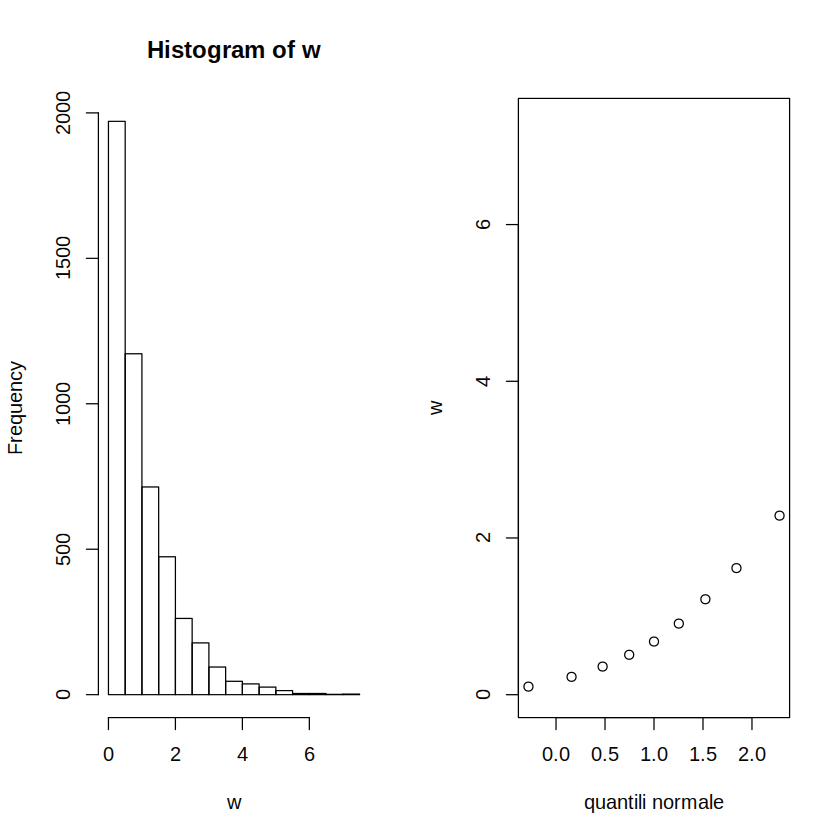

[1] 5


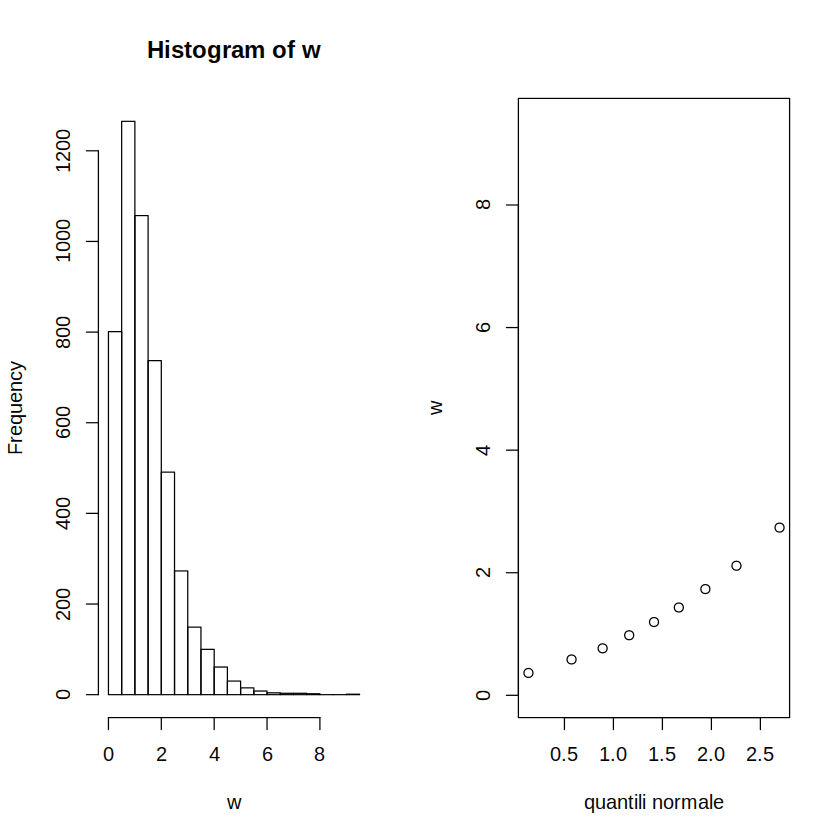

[1] 10


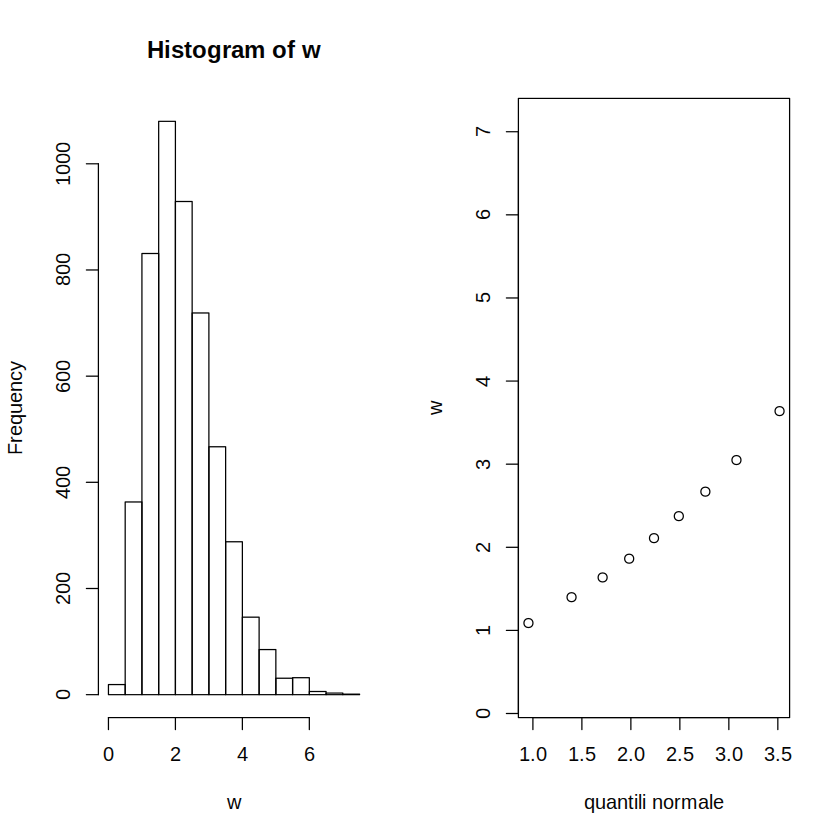

[1] 100


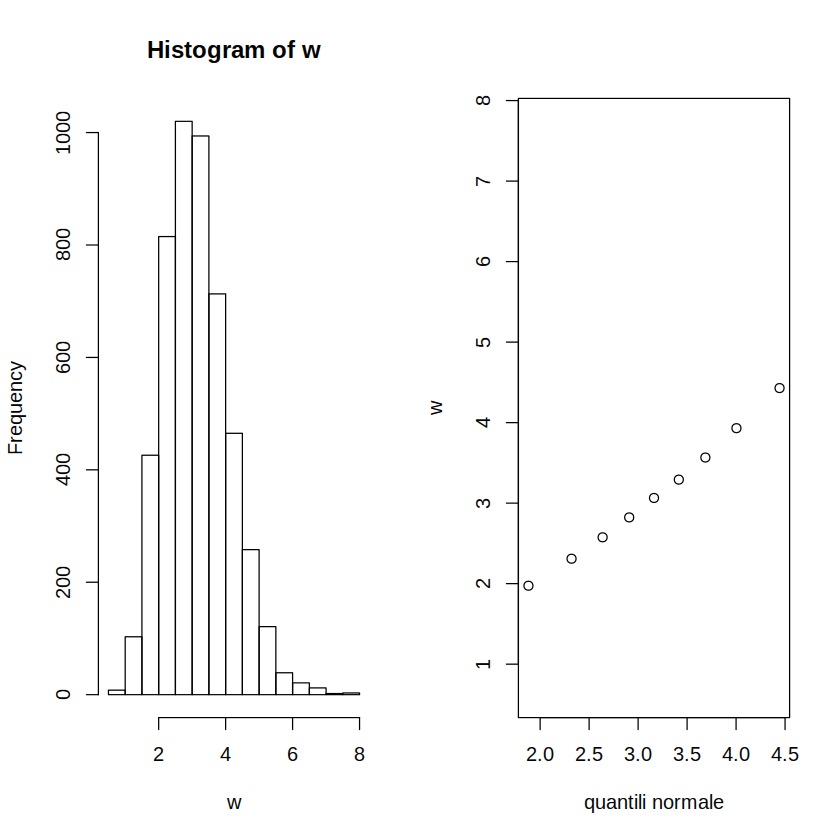

[1] 1000


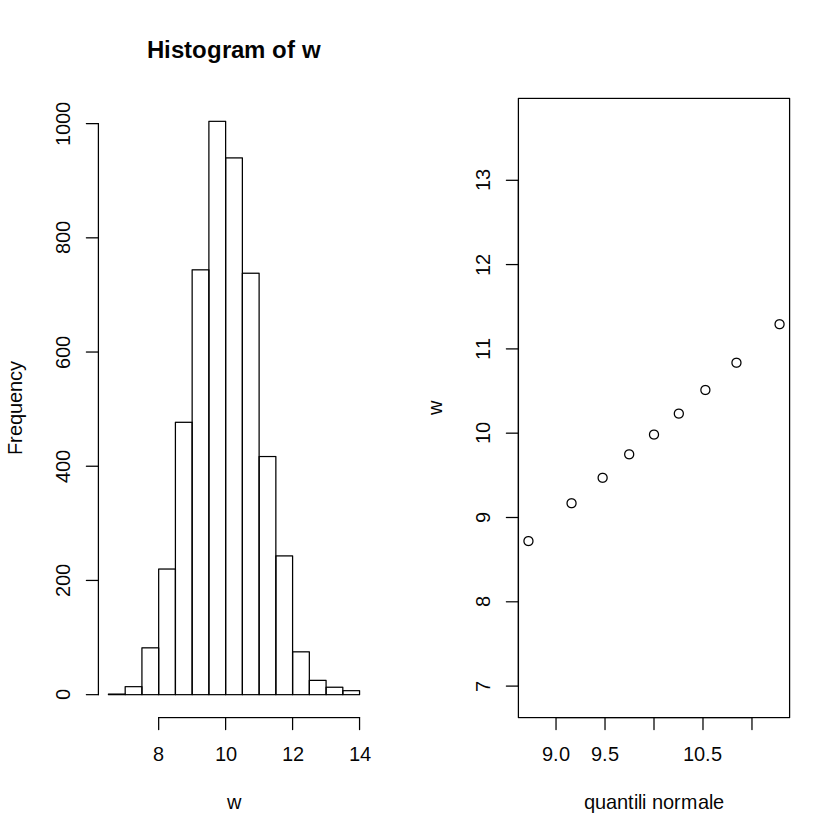

[1] 1e+05


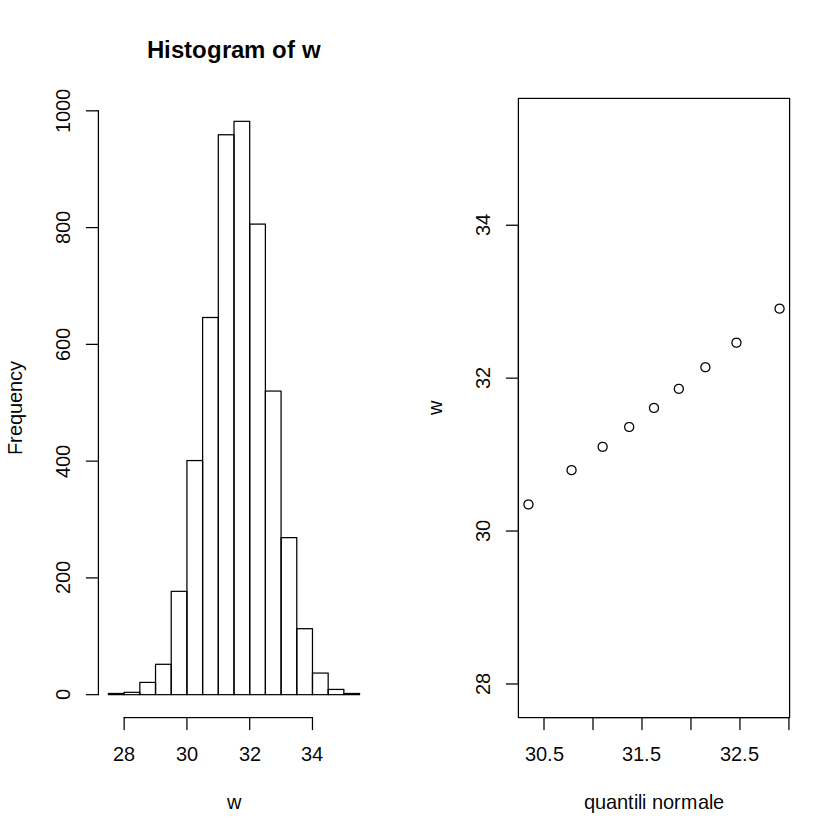

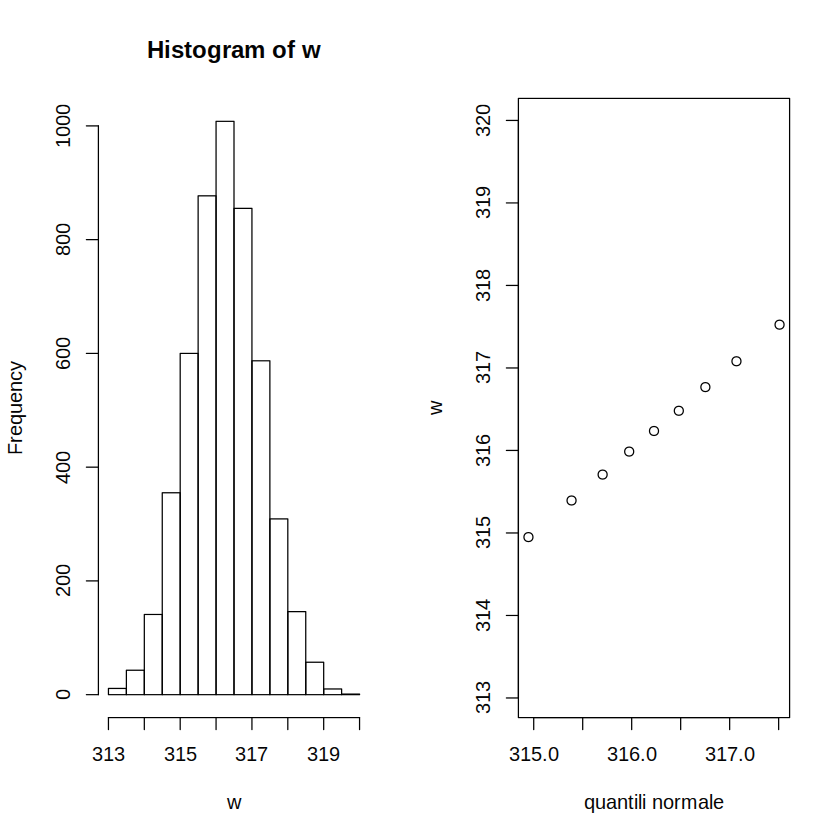

In [42]:
for (n in c(1,2,5,10,100,1000,100000)) {
    w = c()
    for (i in 1:5000) {
        w = c(w, sum(rexp(n, 1))/sqrt(n))
    }
    print(n)
    par(mfrow=c(1,2))
    hist(w)
    qqplot(qnorm(seq(0,1,0.1), sqrt(n), 1), w, xlab="quantili normale")
}